### Import libraries 

In [19]:
#per creare rete
import pandas as pd
from extract import Count, SocialETL, SocialDB
from rich import print
import networkx as nx
import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state

#per la task
import networkx as nx
import cdlib
from cdlib import evaluation
from cdlib import algorithms

#altre
import seaborn as sns
import numpy as np
import math
import warnings
from collections import Counter
import numpy as np
warnings.filterwarnings('ignore')

In [20]:
m = SocialDB(100)
m.df

,class
id,
842316,prorus
110715,proukr
873139,prorus
143277,proukr
965596,nocare
...,...
878648,proukr
531177,prorus
968881,proukr


In [21]:
m.edges

[{'id': 496432, 'from': 553427, 'to': 587116},
 {'id': 859331, 'from': 984281, 'to': 835469},
 {'id': 623542, 'from': 440313, 'to': 515763},
 {'id': 319593, 'from': 160331, 'to': 515763},
 {'id': 393330, 'from': 391963, 'to': 440313},
 {'id': 806106, 'from': 490669, 'to': 595712},
 {'id': 913305, 'from': 983303, 'to': 968881},
 {'id': 303724, 'from': 964548, 'to': 463366},
 {'id': 907452, 'from': 391963, 'to': 827200},
 {'id': 237999, 'from': 697051, 'to': 857051},
 {'id': 920886, 'from': 887950, 'to': 531177},
 {'id': 959024, 'from': 229832, 'to': 631278},
 {'id': 377470, 'from': 965436, 'to': 328395},
 {'id': 585660, 'from': 419403, 'to': 860862},
 {'id': 464959, 'from': 263542, 'to': 873139},
 {'id': 867932, 'from': 933633, 'to': 860862},
 {'id': 397795, 'from': 228322, 'to': 933633},
 {'id': 475104, 'from': 288537, 'to': 926119},
 {'id': 811529, 'from': 806992, 'to': 984281},
 {'id': 735880, 'from': 921703, 'to': 860862},
 {'id': 477945, 'from': 712555, 'to': 313838},
 {'id': 55906

In [22]:
g= list(m.df.index)
G = nx.Graph()
G.add_nodes_from(g, stand=m.df["class"])

In [25]:
edges = [(x["from"], x["to"]) for x in m.edges]
print(edges)

[
    (553427, 587116),
    (984281, 835469),
    (440313, 515763),
    (160331, 515763),
    (391963, 440313),
    (490669, 595712),
    (983303, 968881),
    (964548, 463366),
    (391963, 827200),
    (697051, 857051),
    (887950, 531177),
    (229832, 631278),
    (965436, 328395),
    (419403, 860862),
    (263542, 873139),
    (933633, 860862),
    (228322, 933633),
    (288537, 926119),
    (806992, 984281),
    (921703, 860862),
    (712555, 313838),
    (328395, 490669),
    (146871, 917675),
    (679208, 857051),
    (878648, 965596),
    (463366, 440313),
    (490669, 598305),
    (151383, 138241),
    (123582, 391963),
    (146871, 206767),
    (844128, 968881),
    (105244, 607152),
    (419403, 410181),
    (835469, 609930),
    (665997, 482065),
    (118832, 419403),
    (383108, 921860),
    (873139, 105244),
    (146871, 118832),
    (419403, 707013),
    (515763, 206767),
    (844128, 965436),
    (328395, 609930),
    (965436, 607152),
    (391963, 114836),
    (712555, 649501),
    (916496, 383108),
    (697051, 887950),
    (983303, 114836),
    (964548, 348755),
    (707013, 739961),
    (933633, 228322),
    (842316, 334162),
    (631278, 965436),
    (842316, 983303),
    (965596, 587839),
    (618022, 118832),
    (229832, 827200),
    (229832, 348755),
    (490669, 451643),
    (775333, 887950),
    (649501, 707013),
    (712555, 451643),
    (227539, 842316),
    (679208, 553427),
    (324163, 926119),
    (410181, 304873),
    (137325, 631278),
    (595712, 519805),
    (229832, 440313),
    (348755, 857051),
    (926119, 482065),
    (618022, 160331),
    (304873, 110715),
    (887950, 553427),
    (860912, 761555),
    (968881, 984281),
    (860862, 917675),
    (844128, 722002),
    (519805, 675251),
    (887950, 577137),
    (860862, 324163),
    (143277, 921860),
    (229832, 761555),
    (842316, 165290),
    (151383, 675251),
    (827200, 835469),
    (255892, 725877),
    (553427, 965436),
    (553427, 195896),
    (844128, 228322),
    (873139, 482065),
    (707013, 926119),
    (440313, 383108),
    (724897, 806992),
    (577137, 775333),
    (324163, 110715),
    (419403, 878648),
    (440313, 553427),
    (334162, 410181),
    (917675, 419403),
    (965596, 649501),
    (146871, 334162),
    (151383, 983303),
    (835469, 873139),
    (973012, 151383),
    (725877, 227539),
    (983303, 105244),
    (675251, 348755),
    (451643, 725877),
    (873139, 351004),
    (490669, 138241),
    (675251, 724897),
    (114836, 195896),
    (739961, 419403),
    (490669, 553564),
    (346056, 160331),
    (419403, 313838),
    (926119, 391963),
    (234301, 143277),
    (334162, 722002),
    (440313, 577137),
    (114836, 451643),
    (842316, 587839),
    (631278, 531177),
    (229832, 110715),
    (123582, 887950),
    (114836, 107229),
    (519805, 618022),
    (440313, 577137),
    (940322, 160331),
    (665997, 844128),
    (873139, 964548),
    (965436, 827200),
    (553427, 110715),
    (727030, 595712),
    (107229, 346056),
    (712555, 587116),
    (490669, 463366),
    (110715, 722002),
    (609930, 739961),
    (324163, 553427),
    (587839, 255892),
    (346056, 806992),
    (675251, 383108),
    (151383, 138241),
    (860912, 878648),
    (328395, 151383),
    (118832, 451643),
    (827200, 607808),
    (553564, 697051),
    (921860, 965436),
    (983303, 675251),
    (595712, 857051),
    (618022, 351004),
    (761555, 675251),
    (722002, 827200),
    (973012, 118832),
    (609930, 607808),
    (419403, 334162),
    (347353, 707013),
    (587839, 146871),
    (580865, 835469),
    (580865, 916496),
    (595712, 587839),
    (711788, 665997),
    (674829, 515763),
    (346056, 391963),
    (921703, 634957),
    (631278, 519805),
    (451643, 580865),
    (618022, 607808),
    (873139, 587116),
    (351004, 577137),
    (107229, 195896),
    (531177, 351004),
    (965596, 195896),
    (679208, 515763),
    (255892, 419403),
    (921703, 324163),
    (328395, 255892),
    (674829, 887

In [26]:
G.add_edges_from(edges)

In [27]:
G.number_of_edges()

295

In [28]:
G.number_of_nodes()

100

## configuration

In [23]:
lp_coms = algorithms.label_propagation(G)

In [24]:
leiden_coms = algorithms.leiden(G)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [8]:
leiden_coms.method_name

NameError: name 'leiden_coms' is not defined

In [9]:
leiden_coms.method_parameters

NameError: name 'leiden_coms' is not defined

In [ ]:
leiden_coms.communities

In [40]:
leiden_coms.overlap

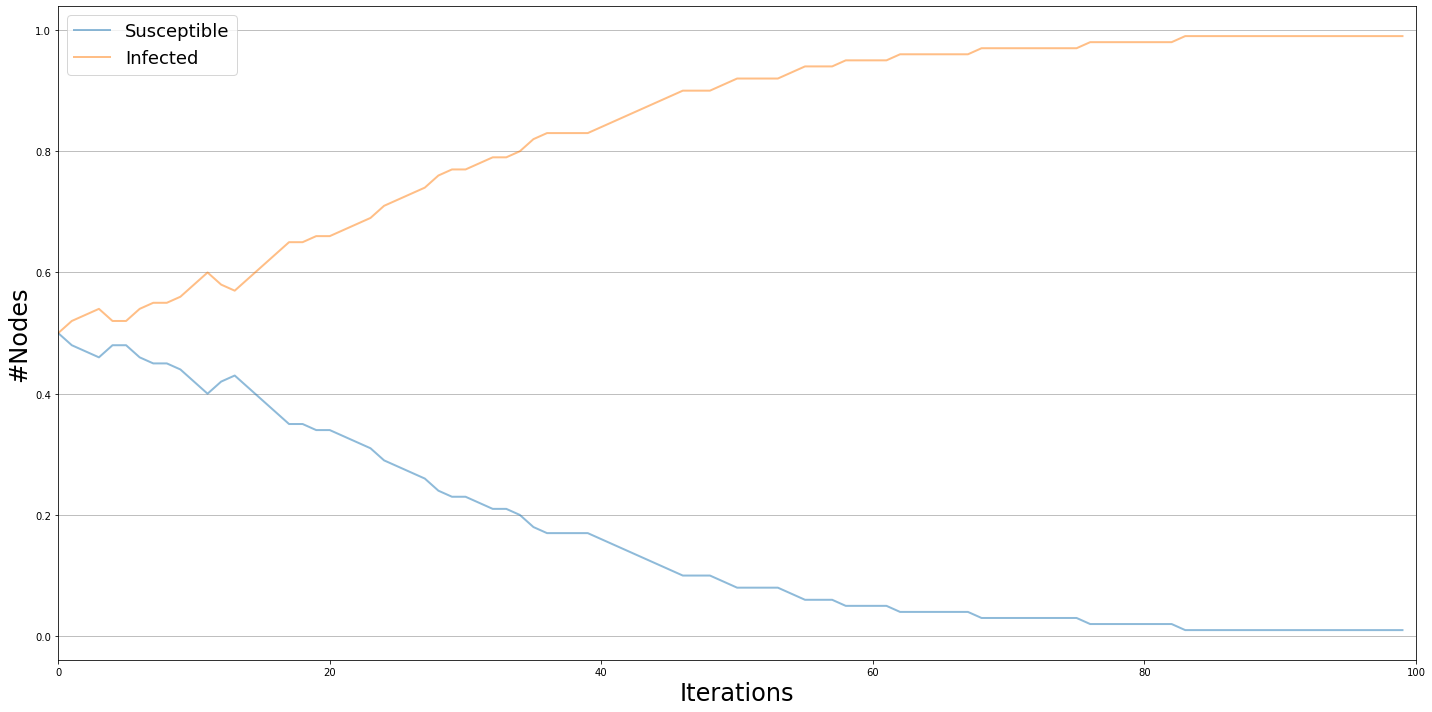

In [41]:
leiden_coms.node_coverage

In [ ]:
leiden_coms.to_json()

## Clustering Evaluation

In [ ]:
leiden_coms.average_internal_degree()

In [ ]:
leiden_coms.average_internal_degree(summary=False)

In [ ]:
evaluation.average_internal_degree(g, leiden_coms)